# 用训练得到的模型预测

2023-6-18

## 进入MMSegmentation主目录

In [36]:
import os
os.chdir('../mmsegmentation')

In [37]:
os.getcwd()

'F:\\openprj\\openmmlab\\mmsegmentation'

## 导入工具包

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mmseg.apis import init_model, inference_model, show_result_pyplot
import mmcv
import cv2

## 载入配置文件

In [39]:
# 载入 config 配置文件
from mmengine import Config
cfg = Config.fromfile('pspnet-WatermelonDataset_20230618.py')

In [40]:
from mmengine.runner import Runner
from mmseg.utils import register_all_modules

# register all modules in mmseg into the registries
# do not init the default scope here because it will be init in the runner

register_all_modules(init_default_scope=False)
runner = Runner.from_cfg(cfg)

06/18 17:30:12 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: win32
    Python: 3.8.16 (default, Mar  2 2023, 03:18:16) [MSC v.1916 64 bit (AMD64)]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: NVIDIA GeForce RTX 4050 Laptop GPU
    CUDA_HOME: None
    MSVC: n/a, reason: fileno
    PyTorch: 1.10.1
    PyTorch compiling details: PyTorch built with:
  - C++ Version: 199711
  - MSVC 192829337
  - Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f055cf1bfa13efb658fe15dc9b41f0740)
  - OpenMP 2019
  - LAPACK is enabled (usually provided by MKL)
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_7

d:\anaconda3\envs\open-mmlab\lib\site-packages\mmengine\utils\manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
F:\openprj\openmmlab\mmsegmentation\mmseg\models\backbones\resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
F:\openprj\openmmlab\mmsegmentation\mmseg\models\builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
F:\openprj\openmmlab\mmsegmentation\mmseg\models\losses\cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTor

06/18 17:30:15 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/18 17:30:15 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

F:\openprj\openmmlab\mmsegmentation\mmseg\engine\hooks\visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


## 载入模型

In [41]:
checkpoint_path = './work_dirs/WatermelonDataset/iter_3000.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')

Loads checkpoint by local backend from path: ./work_dirs/WatermelonDataset/iter_3000.pth


## 载入测试集图像，或新图像

In [42]:
img = mmcv.imread('./data/Watermelon87_Semantic_Seg_Mask/img_dir/val/5b3c8018N634d43bd.jpg')

## 语义分割预测

In [43]:
result = inference_model(model, img)

In [44]:
result.keys()

['seg_logits', 'pred_sem_seg']

In [45]:
pred_mask = result.pred_sem_seg.data[0].cpu().numpy()

In [46]:
pred_mask.shape

(800, 800)

In [47]:
np.unique(pred_mask)

array([0, 1, 2, 3, 4], dtype=int64)

## 可视化语义分割预测结果

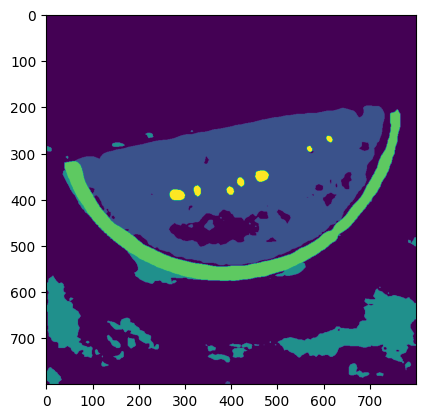

In [48]:
plt.imshow(pred_mask)
plt.show()

06/18 17:30:21 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


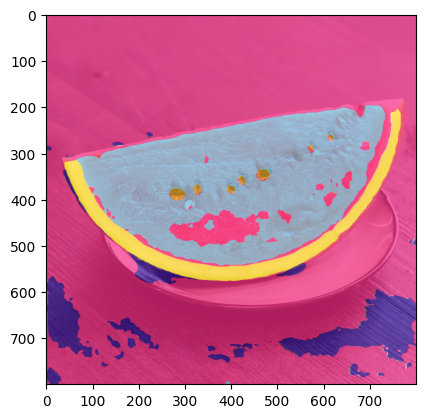

In [49]:
# 可视化预测结果
visualization = show_result_pyplot(model, img, result, opacity=0.7, out_file='pred.jpg')
plt.imshow(mmcv.bgr2rgb(visualization))
plt.show()

## 获取测试集标注

In [50]:
label = mmcv.imread('./data/Watermelon87_Semantic_Seg_Mask/ann_dir/val/5b3c8018N634d43bd.png')

In [51]:
label.shape

(800, 800, 3)

三个通道全部一样，只取一个通道作为标注即可。

In [52]:
label_mask = label[:,:,0]

In [53]:
label_mask.shape

(800, 800)

In [54]:
np.unique(label_mask)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

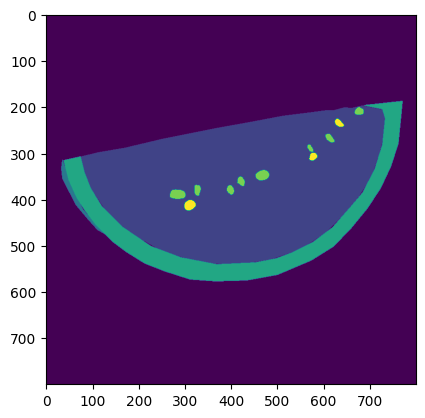

In [55]:
plt.imshow(label_mask)
plt.show()

## 对比测试集标注和语义分割预测结果

In [56]:
# 测试集标注
label_mask.shape

(800, 800)

In [57]:
# 语义分割预测结果
pred_mask.shape

(800, 800)

In [58]:
# 真实为前景，预测为前景
TP = (label_mask == 1) & (pred_mask==1)

In [59]:
# 真实为背景，预测为背景
TN = (label_mask == 0) & (pred_mask==0)

In [60]:
# 真实为前景，预测为背景
FN = (label_mask == 1) & (pred_mask==0)

In [61]:
# 真实为背景，预测为前景
FP = (label_mask == 0) & (pred_mask==1)

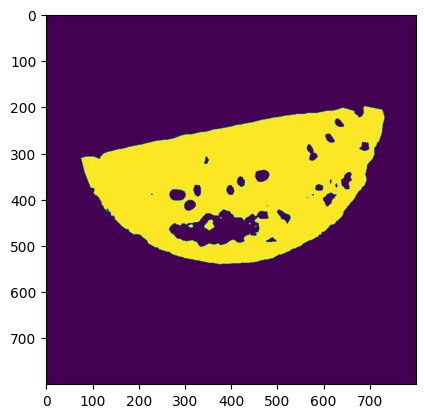

In [62]:
plt.imshow(TP)
plt.show()

In [63]:
confusion_map = TP * 255 + FP * 150 + FN * 80 + TN * 30

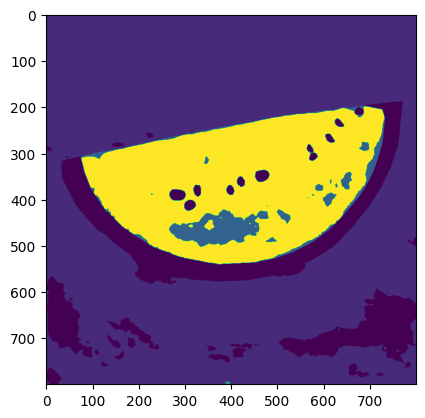

In [64]:
plt.imshow(confusion_map)
plt.show()

## 混淆矩阵

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
confusion_matrix_model = confusion_matrix(label_mask.flatten(), pred_mask.flatten())

In [67]:
confusion_matrix_model

array([[409913,    126,  38430,      2,      0,      0],
       [ 15596, 133544,      0,      5,    362,      0],
       [  1015,      0,    350,     18,      0,      0],
       [  6842,   1089,    846,  28398,      0,      0],
       [   257,    306,      0,      0,   1981,      0],
       [    54,    866,      0,      0,      0,      0]], dtype=int64)

In [68]:
import itertools
def cnf_matrix_plotter(cm, classes, cmap=plt.cm.Blues):
    """
    传入混淆矩阵和标签名称列表，绘制混淆矩阵
    """
    plt.figure(figsize=(10, 10))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    # plt.colorbar() # 色条
    tick_marks = np.arange(len(classes))
    
    plt.title('Confusion Matrix', fontsize=30)
    plt.xlabel('Pred', fontsize=25, c='r')
    plt.ylabel('True', fontsize=25, c='r')
    plt.tick_params(labelsize=16) # 设置类别文字大小
    plt.xticks(tick_marks, classes, rotation=90) # 横轴文字旋转
    plt.yticks(tick_marks, classes)
    
    # 写数字
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 fontsize=12)

    plt.tight_layout()

    plt.savefig('混淆矩阵.pdf', dpi=300) # 保存图像
    plt.show()

In [69]:
classes = ['background', 'red', 'green', 'white', 'seed-black', 'seed-white']

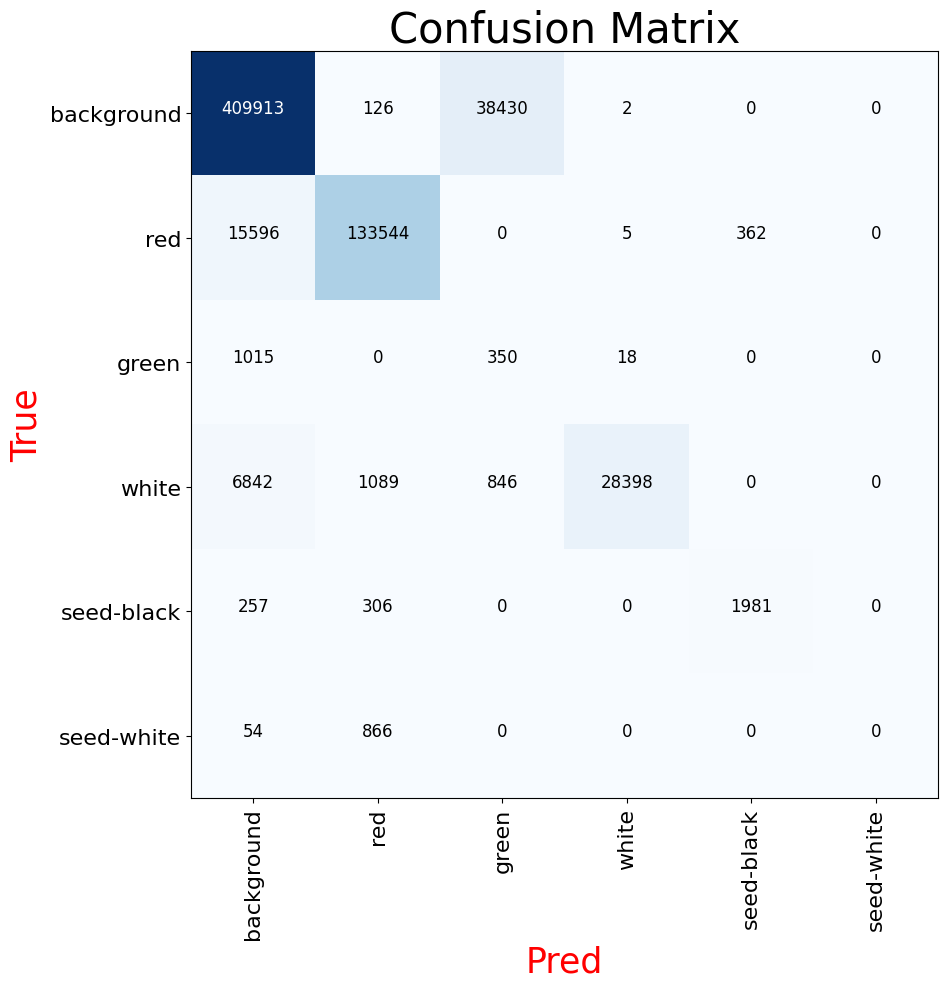

In [70]:
cnf_matrix_plotter(confusion_matrix_model, classes, cmap='Blues')

Unlabeled类别，既无预测结果，也无标签，因此混淆矩阵中不显示。